In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

style.use("fivethirtyeight")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#PUXANDO PNAD BRUTA DA PASTA COMPARTILHADA NO DRIVE
#pnad_covid = pd.read_csv("/content/drive/MyDrive/Avaliação de Políticas Sociais/PNAD COVID 19 inteira.csv")

pnad_covid = pd.read_csv("/content/drive/MyDrive/Avaliação de Políticas Sociais/pnad_covid_inteira.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,26,27,28,29,30,31,44,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,82,93,96,133,134,135,136,137,141,142,143,144,145) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1]:
import pandas as pd

# CARREGANDO A PNAD COVID

data_base = 'C:/Users/Jack/Desktop/AVALIAÇÃO DE POLÍTICAS SOCIAIS/'

pnad_covid = pd.read_csv(data_base+'pnad_covid_inteira.csv', sep = ',')

C:\Users\Jack\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (25,26,27,28,29,30,31,44,60,62,63,64,65,66,67,68,69,70,71,72,73,74,75,82,93,96,133,134,135,136,137,141,142,143,144,145) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
#Mudando nome das colunas
pnad_covid = pnad_covid[['semana','mes_pesq','a003','c017a','d0051','upa','v1008', 'sigla_uf','v1016', 'v1022', 'a001a', 'd0053','a004', 'a005', 'idade', 'dia_nasc', 'mes_nasc', 'ano_nasc', 'data_nasc', 'idade_out']]
pnad_covid = pnad_covid.rename(columns = {'semana':'semana_pesq','a003':'sexo','c017a':'desalento','d0051':'aux_emerg','upa':'upa', 'v1008':'num_selec_dom','v1016':'num_entrevista_dom','v1022':'situacao_dom', 'a001a':'condicao_no_dom', 'd0053':'soma_valor_aux_emerg', 'a004':'raça', 'a005':'escolaridade'})

KeyError: "['semana', 'a004', 'd0051', 'v1008', 'a001a', 'a005', 'c017a', 'v1016', 'd0053', 'v1022', 'a003'] not in index"

In [13]:
pnad_covid = pnad_covid.loc[(pnad_covid.mes_pesq == 5)]

In [14]:
pnad_covid["chave_dom"] = pnad_covid.apply(lambda x: f"{x.upa}{x.num_selec_dom}", axis = 1).astype(int)

OverflowError: Python int too large to convert to C long

In [7]:
pnad_covid = pnad_covid.set_index('chave_dom')

In [8]:
#criando a chave de novo para fazer o count
pnad_covid["chave_dom"] = pnad_covid.apply(lambda x: f"{x.upa}{x.num_selec_dom}", axis = 1).astype(int)

In [9]:
chave_dom_count = pd.DataFrame({'contagem': pnad_covid['chave_dom'].loc[(pnad_covid.mes_pesq == 5) & (pnad_covid.idade_out >= 18)].value_counts()})

#chave_dom_count = pd.DataFrame({'contagem': pnad_covid['chave_dom'].loc[(pnad_covid.mes_pesq == 5)].value_counts()})


#1300211325

In [10]:
chave_dom_count

,contagem
2300645502,11
3100539523,10
13004779414,10
3101363883,10
1300211325,10
...,...
52001827013,1
52008632512,1
3100412105,1
41000653010,1


In [11]:
pnad_covid = pd.merge(pnad_covid, chave_dom_count, left_index=True, right_index=True)

In [12]:
#casos em que temos uma mãe solteira (R$ 1200) e um indivíduo maior de 18, o que nos deixaria com um aux percapita de 600.

pnad_covid.loc[(pnad_covid.mes_pesq == 5) & (pnad_covid.soma_valor_aux_emerg == 1200) & (pnad_covid.contagem == 2) & pnad_covid.idade_out >=18]

#como podemos ver, não há nenhum caso deste tipo

,semana_pesq,mes_pesq,sexo,desalento,aux_emerg,upa,num_selec_dom,sigla_uf,num_entrevista_dom,situacao_dom,condicao_no_dom,soma_valor_aux_emerg,raça,escolaridade,idade,dia_nasc,mes_nasc,ano_nasc,data_nasc,idade_out,chave_dom,contagem


In [13]:
pnad_covid['aux_percapita'] = pnad_covid['soma_valor_aux_emerg'] / pnad_covid['contagem']

In [14]:
pnad_covid

,semana_pesq,mes_pesq,sexo,desalento,aux_emerg,upa,num_selec_dom,sigla_uf,num_entrevista_dom,situacao_dom,condicao_no_dom,soma_valor_aux_emerg,raça,escolaridade,idade,dia_nasc,mes_nasc,ano_nasc,data_nasc,idade_out,chave_dom,contagem,aux_percapita
1100000161,1,5,1,NaN,2,110000016,1,RO,1,1,10,NaN,4,2,7,29,12,2012,2012-12-29,7.416996,1100000161,3,NaN
1100000161,1,5,2,2.0,2,110000016,1,RO,1,1,5,NaN,4,5,19,24,1,2001,2001-1-24,19.346067,1100000161,3,NaN
1100000161,1,5,2,NaN,2,110000016,1,RO,1,1,5,NaN,4,5,28,15,2,1992,1992-2-15,28.288078,1100000161,3,NaN
1100000161,1,5,2,NaN,2,110000016,1,RO,1,1,1,NaN,4,5,46,2,2,1974,1974-2-2,46.322687,1100000161,3,NaN
1100000161,1,6,1,NaN,2,110000016,1,RO,2,1,10,NaN,4,2,7,29,12,2012,2012-12-29,7.501871,1100000161,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53005106712,3,10,2,1.0,2,530051067,12,DF,6,1,5,NaN,4,2,14,26,1,2006,2006-1-26,14.760069,53005106712,1,NaN
53005106712,3,10,2,NaN,2,530051067,12,DF,6,1,1,NaN,1,5,43,25,7,1977,1977-7-25,43.267180,53005106712,1,NaN
53005106712,3,11,2,1.0,2,530051067,12,DF,7,1,5,NaN,1,4,15,17,12,2004,2004-12-17,15.953797,53005106712,1,NaN
53005106712,3,11,2,1.0,2,530051067,12,DF,7,1,5,NaN,4,2,14,26,1,2006,2006-1-26,14.844944,53005106712,1,NaN


In [ ]:
pnad_covid.loc[(pnad_covid.mes_pesq == 5)]

,semana_pesq,mes_pesq,sexo,desalento,aux_emerg,upa,num_selec_dom,sigla_uf,num_entrevista_dom,situacao_dom,condicao_no_dom,soma_valor_aux_emerg,raça,escolaridade,idade,dia_nasc,mes_nasc,ano_nasc,data_nasc,idade_out,chave_dom,contagem,aux_percapita
1100000161,1,5,1,NaN,2,110000016,1,RO,1,1,10,NaN,4,2,7,29,12,2012,2012-12-29,7.416996,1100000161,3,NaN
1100000161,1,5,2,2.0,2,110000016,1,RO,1,1,5,NaN,4,5,19,24,1,2001,2001-1-24,19.346067,1100000161,3,NaN
1100000161,1,5,2,NaN,2,110000016,1,RO,1,1,5,NaN,4,5,28,15,2,1992,1992-2-15,28.288078,1100000161,3,NaN
1100000161,1,5,2,NaN,2,110000016,1,RO,1,1,1,NaN,4,5,46,2,2,1974,1974-2-2,46.322687,1100000161,3,NaN
1100000162,4,5,1,NaN,2,110000016,2,RO,1,1,1,NaN,1,7,50,14,2,1970,1970-2-14,50.289917,1100000162,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53005106710,3,5,1,NaN,1,530051067,10,DF,1,1,5,600.0,1,5,36,13,2,1984,1984-2-13,36.293725,53005106710,2,300.0
53005106710,3,5,2,2.0,1,530051067,10,DF,1,1,1,600.0,1,2,73,27,8,1946,1946-8-27,73.759275,53005106710,2,300.0
53005106712,3,5,2,1.0,2,530051067,12,DF,1,1,5,NaN,4,4,15,17,12,2004,2004-12-17,15.450022,53005106712,1,NaN
53005106712,3,5,2,1.0,2,530051067,12,DF,1,1,5,NaN,4,2,14,26,1,2006,2006-1-26,14.341169,53005106712,1,NaN


In [15]:
#Transformando o desalento em 0 e 1. 0: desalentado (embora não tenha procurado gostaria de ter trabalhado na ultima semana), 1: não está desalentado (não trabalhou e nem gostaria de ter trabalhado na última semana)
pnad_covid['desalento'].replace([1,2], [1,0], inplace = True)

pnad_covid['aux_emerg'].replace([1,2], [1,0], inplace = True)

#Separando os indivíduos por quem tem graduação e quem não tem. 0: não tem, 1: tem
#No caso para o subgrupo amostral que tem entre 17 e 18 anos, podemos separar para quem concluiu o ensino médio e quem não concluiu
pnad_covid['escolaridade'].replace([1, 2, 3, 4, 5, 6, 7, 8], [0, 0, 0, 0, 1, 1, 1, 1], inplace = True)

# 1: Branco, 0: restante
pnad_covid['raça'].replace([1, 2, 3, 4, 5, 9], [1, 0, 0, 0, 0, 0], inplace = True)

# 1: é homem, 0: é mulher
pnad_covid['sexo'].replace([1,2], [1,0], inplace = True)

In [16]:
pnad_covid_set_1 = pnad_covid[['desalento',
                             'escolaridade',
                             'raça',
                             'sexo', 
                             'idade_out',
                             'aux_percapita'
                             ]].loc[
                                            (pnad_covid.mes_pesq == 5)
                                            &
                                            (pnad_covid.idade_out >= 14)
                                            &
                                            (pnad_covid.idade_out < 18)
                                            &
                                            (pnad_covid.aux_emerg == 0)
                                            ].dropna(subset=['desalento'])

pnad_covid_set_2 = pnad_covid[['desalento',
                             'escolaridade',
                             'raça',
                             'sexo', 
                             'idade_out',
                             'aux_percapita'
                             ]].loc[
                                            (pnad_covid.mes_pesq == 5)
                                            &
                                            (pnad_covid.idade_out >= 18)
                                            &
                                            (pnad_covid.idade_out <= 22)                                          
                                                                         
                                            ].dropna(subset=['desalento'])

In [33]:
#pnad_covid_set_1['aux_emerg'] = 0

pnad_covid_set_2

,desalento,escolaridade,raça,sexo,idade_out,aux_percapita
1100000161,0.0,1,0,0,19.346067,NaN
1100000169,1.0,1,1,0,20.495989,300.000000
1100001088,1.0,1,0,1,19.556886,NaN
1100001532,0.0,1,0,1,18.560287,257.142857
1100001535,0.0,1,0,1,21.426878,200.000000
...,...,...,...,...,...,...
53004376613,0.0,1,0,1,20.701332,NaN
53004419814,0.0,1,0,0,19.389873,NaN
53004613813,0.0,1,0,1,21.629483,NaN
53004613813,0.0,1,0,0,19.373446,NaN


In [20]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

In [31]:
#Probit apenas para o controle

Y_cont = pnad_covid_set_1["desalento"]
X_cont = pnad_covid_set_1.drop(["desalento","aux_percapita"], 1)
X_cont = sm.add_constant(X_cont)
model_cont = Probit(Y_cont, X_cont.astype(float))
probit_model_cont = model_cont.fit()
#print(probit_model_cont.summary())

probit_model_cont.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.537111
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.5855,0.224,-15.987,0.000,-4.025,-3.146
escolaridade,0.0995,0.068,1.473,0.141,-0.033,0.232
raça,-0.2377,0.030,-7.797,0.000,-0.297,-0.178
sexo,0.0435,0.030,1.446,0.148,-0.015,0.102
idade_out,0.1850,0.014,13.252,0.000,0.158,0.212


In [29]:
#Probit apenas para o tratamento

Y_trat = pnad_covid_set_2["desalento"]
X_trat = pnad_covid_set_2.drop(["desalento","aux_percapita"], 1)
X_trat = sm.add_constant(X_trat)
model_trat = Probit(Y_trat, X_trat.astype(float))
probit_model_trat = model_trat.fit()
#print(probit_model_trat.summary())

probit_model_trat.summary().tables[1]



Optimization terminated successfully.
         Current function value: 0.660348
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.5285,0.203,-2.599,0.009,-0.927,-0.130
escolaridade,-0.0143,0.026,-0.557,0.578,-0.065,0.036
raça,-0.3394,0.025,-13.615,0.000,-0.388,-0.291
sexo,0.0921,0.024,3.820,0.000,0.045,0.139
idade_out,0.0450,0.010,4.362,0.000,0.025,0.065


In [ ]:
Y = base_tratada["desalento"]
X = base_tratada.drop(["desalento","aux_percapita","sexo","raça","escolaridade","maior_18"], 1)
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
print(probit_model.summary())

#probit_model.summary().tables[1]

In [32]:
df = [pnad_covid_set_1, pnad_covid_set_2]
base_tratada = pd.concat(df, axis=0)

In [37]:
base_tratada.loc[base_tratada['aux_percapita'] == 600, 'aux_emerg'] = 1
base_tratada.loc[base_tratada['aux_percapita'] != 600, 'aux_emerg'] = 0 


base_tratada.loc[base_tratada['idade_out'] >=18, 'maior_18'] = 1
base_tratada.loc[base_tratada['idade_out'] < 18, 'maior_18'] = 0


In [ ]:
base_tratada

,desalento,escolaridade,raça,sexo,idade_out,aux_percapita,aux_emerg,maior_18
1100000163,1.0,0,0,1,17.251566,NaN,0.0,0.0
1100000168,1.0,0,0,0,14.981839,NaN,0.0,0.0
1100000341,0.0,0,0,0,16.578041,NaN,0.0,0.0
1100000345,0.0,0,0,0,14.546512,NaN,0.0,0.0
1100000529,0.0,0,1,1,14.866847,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...
53004376613,0.0,1,0,1,20.701332,NaN,0.0,1.0
53004419814,0.0,1,0,0,19.389873,NaN,0.0,1.0
53004613813,0.0,1,0,1,21.629483,NaN,0.0,1.0
53004613813,0.0,1,0,0,19.373446,NaN,0.0,1.0


In [34]:
#centralizando a variável de idade no 0

base_tratada['idade_out'] -= 18

In [ ]:
#criando um dummie para idade acima de 18 (idade mínima para começar a receber o auxílio, nosso ponto de corte)

#base_tratada = base_tratada.assign(aux_emerg=(base_tratada["idade_out"] > 0).astype(int))

#criando uma variável de interação entre o cutoff e idade_out, para entender o efeito do tratamento sobre os indivíduos com +18 anos

#base_tratada['cutoff*idade_out'] = base_tratada['cutoff']*base_tratada['idade_out']

In [35]:
base_tratada

,desalento,escolaridade,raça,sexo,idade_out,aux_percapita
1100000163,1.0,0,0,1,-0.748434,NaN
1100000168,1.0,0,0,0,-3.018161,NaN
1100000341,0.0,0,0,0,-1.421959,NaN
1100000345,0.0,0,0,0,-3.453488,NaN
1100000529,0.0,0,1,1,-3.133153,NaN
...,...,...,...,...,...,...
53004376613,0.0,1,0,1,2.701332,NaN
53004419814,0.0,1,0,0,1.389873,NaN
53004613813,0.0,1,0,1,3.629483,NaN
53004613813,0.0,1,0,0,1.373446,NaN


In [19]:
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

In [39]:
#a idade já é um fator que causa alta variabilidade nos no desalento, os outros fatores tem efeitos parecidos se a distriuição de caracteristicas for normal

Y = base_tratada["desalento"]
X = base_tratada.drop(["desalento","aux_percapita","sexo","raça","escolaridade","maior_18"], 1)
X = sm.add_constant(X)
model = Probit(Y, X.astype(float))
probit_model = model.fit()
#print(probit_model.summary())

probit_model.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.622693
         Iterations 5


,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.1815,0.009,-19.158,0.000,-0.200,-0.163
idade_out,0.2083,0.004,48.132,0.000,0.200,0.217
aux_emerg,0.2791,0.051,5.462,0.000,0.179,0.379


In [ ]:
base_tratada['desalento_previsto'] = probit_model.predict()

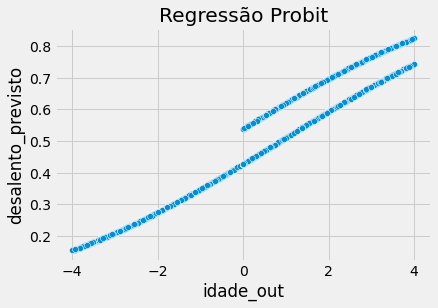

In [ ]:
sns.scatterplot(x='idade_out', y = 'desalento_previsto', data = base_tratada) #.loc[((pnad_covid['idade'] >= 14) & (pnad_covid['idade'] < 18))])

#sns.scatterplot(x='idade_out', y = 'desalento_previsto', data = base_tratada.loc[((pnad_covid['idade'] >= 18) & (pnad_covid['idade'] <= 22))])

plt.title("Regressão Probit");

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Probit

In [ ]:
# probit model: https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_overview.html

#ploting: https://www.statsmodels.org/dev/examples/notebooks/generated/discrete_choice_example.html?highlight=probit


import matplotlib as plt
